In [2]:
!git clone https://github.com/TorchSpatiotemporal/tsl.git
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-1.10.1+cu113.html
!pip install ./tsl

Cloning into 'tsl'...
remote: Enumerating objects: 578, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 578 (delta 57), reused 49 (delta 49), pack-reused 516
Receiving objects: 100% (578/578), 205.53 KiB | 13.70 MiB/s, done.
Resolving deltas: 100% (314/314), done.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.4 MB/s eta 0:15:28tcmalloc: large alloc 1147494400 bytes == 0x39b7a000 @  0x7fe0b9762615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:14:25tcmalloc: large alloc 1434370048 bytes == 0x7e1d0000 @  0x7fe0b9762615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x5

In [1]:
import tsl
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
tsl.logger.disabled = True

print(f"tsl version  : {tsl.__version__}")
print(f"torch version: {torch.__version__}")

tsl version  : 0.1.0
torch version: 1.10.1+cu111


In [2]:
from tsl.datasets import MetrLA
dataset = MetrLA()
print(dataset)

MetrLA(length=34272, n_nodes=207, n_channels=1)


In [3]:
df = dataset.dataframe()
df.head()

nodes,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
channels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428574,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666668,68.555557,65.444443,62.444443,64.444443,68.111115,65.000,65.000,57.444443,63.333332,...,50.666668,69.875,66.666664,58.555557,62.000,61.111111,64.444443,55.888889,68.444443,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000
2012-03-01 00:15:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000
2012-03-01 00:20:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


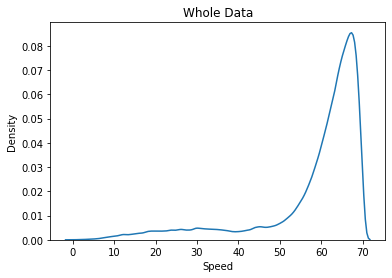

In [4]:
ax = sns.distplot(df, kde=True, hist=False)
plt.xlabel("Speed")
plt.ylabel("Density")
plt.title("Whole Data")
plt.show(ax)

In [5]:
p1, p2, p3 = df['773869'], df['767541'], df['767542']

In [6]:
p1.quantile(0.025), p1.quantile(0.975)

(channels
 0    17.25
 Name: 0.025, dtype: float64, channels
 0    69.0
 Name: 0.975, dtype: float64)

In [7]:
p2.quantile(0.025), p2.quantile(0.975)

(channels
 0    56.375
 Name: 0.025, dtype: float64, channels
 0    68.111115
 Name: 0.975, dtype: float64)

In [8]:
p3.quantile(0.025), p3.quantile(0.975)

(channels
 0    24.777779
 Name: 0.025, dtype: float64, channels
 0    69.625
 Name: 0.975, dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

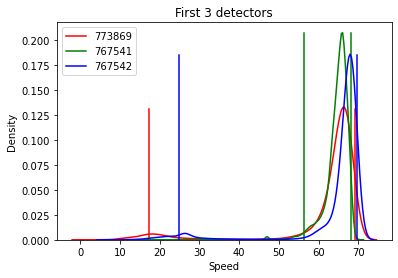

In [9]:
p1, p2, p3 = df['773869'], df['767541'], df['767542']
ax1 = sns.distplot(p1, kde=True, hist=False, label='773869', color = 'r')
ax1.axvline(17.25, 0, 0.6, color = 'r')
ax1.axvline(69, 0, 0.6, color = 'r')
ax2 = sns.distplot(p2, kde=True, hist=False, label='767541', color = 'g')
ax2.axvline(56.375, 0, 0.95, color = 'g')
ax2.axvline(68.11, 0, 0.95, color = 'g')
ax3 = sns.distplot(p3, kde=True, hist=False, label='767542', color = 'b')
ax3.axvline(24.78, 0, 0.85, color = 'b')
ax3.axvline(69.63, 0, 0.85, color = 'b')
plt.xlabel("Speed")
plt.ylabel("Density")
plt.title("First 3 detectors")
plt.legend()
plt.show(ax1)
plt.show(ax2)
plt.show(ax3)